In [3]:
from tinytensor.engine import Tensor
from tinytensor.nn import Model, Dense, mse, l2_reg, array_to_Tensor_list
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
import sys
print(sys.executable)

/Users/paulanderson/Projects/nn_work/env/bin/python

/Users/paulanderson/Projects/nn_work/nn_learning/env/bin/python


X shape: (100, 2)
y shape: (100, 1)


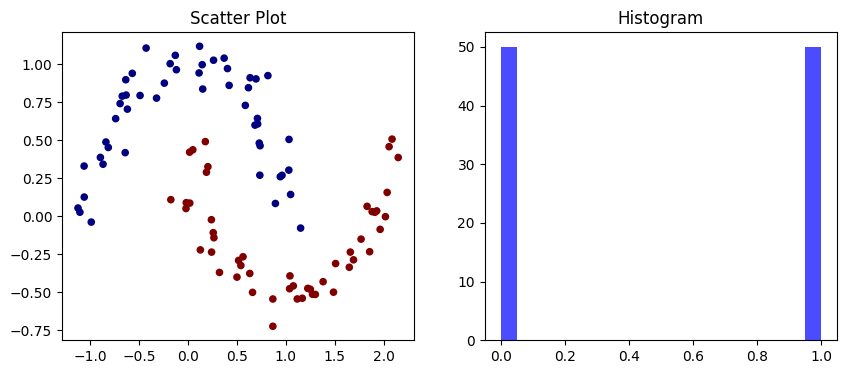

In [3]:
# Make dataset
X, y = make_moons(n_samples=100, noise=0.1)
y = y.reshape(-1,1)
# y = y*2 - 1

print("X shape:",X.shape)
print("y shape:",y.shape)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Scatter plot on the left
axs[0].scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
axs[0].set_title('Scatter Plot')

# Histogram on the right
axs[1].hist(y, bins=20, color='blue', alpha=0.7)
axs[1].set_title('Histogram')

# Display the figure
plt.show()


In [18]:
# setup the model
Xt = array_to_Tensor_list(X)
yt = array_to_Tensor_list(y)

initial_model = Model()
initial_model.layers.append(Dense(2,4,"relu"))
initial_model.layers.append(Dense(4,4,"relu"))
initial_model.layers.append(Dense(4,1,"sigmoid"))


In [19]:
def loss(model: Model,x: list,y: list) -> Tuple[Tensor,float]:
        
    #forward pass
    yhats = list(map(model,x))

    #calculate losses
    losses = [yi - yhat for yhat,yi in zip(yhats,y)]

    #loss functions
    data_loss = mse(losses)
    total_loss = data_loss

    #calculate accuracy
    accuracies = [(yhat.data > 0.5) == (yi.data > 0.5) for yhat,yi in zip(yhats,y)]
    accuracy = sum(accuracies) / len(accuracies)

    return total_loss,accuracy

def train(model: Model,X: list,y: list) -> list:
    
    total_loss,accuracy = loss(model,X,y)
    print(f"total_loss: {total_loss.data}; accuracy:{accuracy}")

    #backward
    total_loss.backward()

    #TODO: return grads here
    #get new layers
    new_layers = [layer.new_weights() for layer in model.layers]
    
    return new_layers

In [20]:
def train_loop(model: Model,X: list,y: list,num_iterations: int) -> Model:
    if num_iterations == 0:
        return model
    else:
        #TODO: return grads here, then implement a standalone optimization function
        new_layers = train(model,X,y)
        new_model = Model(layers = new_layers)

        return train_loop(new_model,X,y,num_iterations - 1)

final_model = train_loop(initial_model,Xt,yt,num_iterations = 10)

AssertionError: Incompatible shapes for dot product

In [21]:
Xt[0].data

array([[1.03225485],
       [0.30314179]])